<center>

<img src="https://www.itv.org/wp-content/uploads/2021/10/logo-itv.svg" width="500" height="200" />

</center>

# <center> **Especialização em Automação** </center>


## <center> **Inteligência Computacional** </center>

---
### <center> **Trabalho Avaliativo Individual - Redes Neurais** </center>

### <center> Professor: André Almeida Santos</center>

#### <center> Valor: **4,0 pontos**</center>

#### <center> Data de entrega: **20/05/2022**</center>

---

# **Proposta do trabalho - Classificação de qualidade de vinho**

Um dataset com amostras de vinho tinto do norte de Portugal foi construído por meio de testes químicos realizados em laboratório. O objetivo desse trabalho é modelar a qualidade do vinho com base nestes testes físico-químicos. Olhe para o dataset como um problema de **classificação**.

---

**O que deve ser feito?**

Treinar um modelo de rede neural usando o dataset disponível no arquivo **'winequality-red.csv'** para classificação da qualidade do vinho.


Você deve fazer o seguinte:
> - Carregar o conjunto de dados
> - Pré-processar os dados definindo as entradas e saída corretamente.
> - Construir o modelo de rede neural com tensorflow + keras
> - Definir os hiperparâmetros adequados
> - Treinar e avaliar o modelo 
> - Plotar os gráficos de erro e acurácia do modelo, tanto do treino quanto de teste
> - Salvar o modelo
> - Realizar previsões com novos dados no modelo salvo
> - Construir uma mensagem customizada para o usuário na predição final

**Obs1: (A realização de todas as etapas acima serão consideradas na nota do trabalho)**

**Obs2:** Defina as variáveis de seed no seu código para eu conseguir reproduzir o seu resultado.

**Dica:** Observe seus dados e veja se é preciso realizar algum tipo de normalização no pré processamento. Se necessário, você pode usar o método [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) ou [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) do sklearn. Leia a documentação e veja como usar os métodos adequadamente.

**Informações do dataset**:

---

Variáveis de entrada (com base em testes físico-químicos):

> 1 - acidez fixa

> 2 - acidez volátil

> 3 - ácido cítrico

> 4 - açúcar residual

> 5 - cloretos

> 6 - dióxido de enxofre livre

> 7 - dióxido de enxofre total

> 8 - densidade

> 9 - pH

> 10 - sulfatos

> 11 - álcool

Variável de saída (com base em dados sensoriais):

> 12 - qualidade (pontuação entre 3 e 8)

### **Objetivo desejado da métrica de qualidade:**

Treine a sua rede para alcançar uma acurácia mínima de 70%.

---

Ao final do noteook use uma célula de texto para comentar sobre a abordagem utilizada para chegar no resultado solicitado. Se você não conseguir a acurácia desejada, comente sobre o que você acha que pode ter influenciado no resultado e quais as possíveis mudanças que poderiam ser realizadas para alcançar o objetivo.

In [1]:
# Vamos começar com os imports necessários
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, LSTM

from sklearn.preprocessing import MinMaxScaler
# Alterando as saídas com o módulo LabelBinarizer para criar o One hot encode
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dados = pd.read_csv("winequality-red2.csv")

In [3]:
dados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Definindo os dados de entrada
entrada = dados.iloc[:, :11]

In [6]:
entrada

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
saida = dados.iloc[:,-1]

In [8]:
saida

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

[0.05152515 0.13229999 0.04698948 0.05457534 0.06406056 0.04741086
 0.0790328  0.05314598 0.0593507  0.13780972 0.27379941]


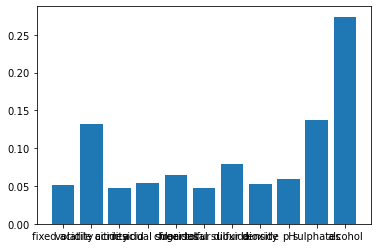

In [9]:
from sklearn.ensemble import RandomForestRegressor
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(entrada, saida)

# mostrar pontuação de importância
print(model.feature_importances_)

# plot pontuação de importância
names = dados.columns.values[0:-1]

ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

In [10]:
entrada = dados.iloc[:,:11]
entrada

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
# Separandos os dados em treino e validação
entrada_train, entrada_val, saida_train, saida_val = train_test_split(entrada, saida, test_size=0.3, random_state=seed, stratify=saida)

In [12]:
# Verificando a divisão dos dados

print(f'entrada_train: {entrada_train.shape}')
print(f'entrada_val: {entrada_val.shape}')
print(f'saida_train: {saida_train.shape}')
print(f'saida_val: {saida_val.shape}')

entrada_train: (1119, 11)
entrada_val: (480, 11)
saida_train: (1119,)
saida_val: (480,)


In [13]:
saida_val

74      5
811     6
271     6
1210    6
321     5
       ..
212     6
132     5
639     6
1592    6
1180    6
Name: quality, Length: 480, dtype: int64

In [14]:
entrada_val

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6
811,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9
271,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1
1210,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4
321,9.3,0.61,0.26,3.4,0.090,25.0,87.0,0.99975,3.24,0.62,9.7
...,...,...,...,...,...,...,...,...,...,...,...
212,11.6,0.44,0.64,2.1,0.059,5.0,15.0,0.99800,3.21,0.67,10.2
132,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0


In [15]:
# Definindo o input
inputs = keras.Input(shape=(11,), name='entrada')

In [16]:
# Definindo as camadas intermediárias
out_int = layers.Dense(5, activation="sigmoid", name='int_1')(inputs)
outputs = layers.Dense(3, name='saida', activation="sigmoid")(out_int)

In [17]:
modelo = keras.Model(inputs=inputs, outputs=outputs, name="modelo_Classificacao")

In [18]:
modelo.summary()

Model: "modelo_Classificacao"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (InputLayer)        [(None, 11)]              0         
                                                                 
 int_1 (Dense)               (None, 5)                 60        
                                                                 
 saida (Dense)               (None, 3)                 18        
                                                                 
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [19]:
keras.utils.plot_model(modelo, "meu_primeiro_modelo_com_informação_do_shape.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [20]:
modelo.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=[['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]],
)

In [21]:
treino = modelo.fit(entrada_train, saida_train, batch_size=11, validation_data=(entrada_val, saida_val), epochs=200)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\aless\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\aless\anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible
